# Import Libraries

In [1]:
#install Pillow for python image viewing purposes
# !pip3 install Pillow
# !pip3 install tensorflow-datasets

In [2]:
#import python libraries
import warnings
import pathlib
import PIL

# Ignore all warnings
warnings.filterwarnings("ignore")

#Data Manipulation libraries
import matplotlib.pyplot as plt
import numpy as np


#Deep Learning libraries
import tensorflow as tf
import keras 
from keras import layers


from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dropout, Dense , Conv2D , MaxPooling2D, Flatten , Activation
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers.experimental.preprocessing import RandomFlip,RandomRotation,RandomZoom,Rescaling
from keras.losses import SparseCategoricalCrossentropy



# Data Acquisition 

### This is the stage where you bring in data in your desired format.

In [3]:
#downloading and extraction of the flower data from this url
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)
data_dir = pathlib.Path(archive).with_suffix('')

In [4]:
dataset_url

'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'

In [5]:
#checking the lenght of the data
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


# Viewing the Images

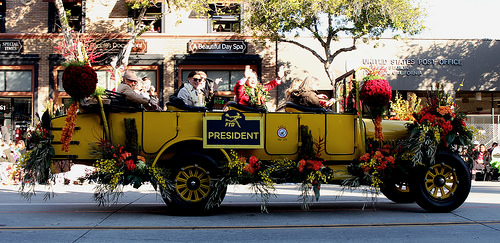

In [6]:
#Checking out the first image in the data
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

# Loading the data

specifying the width and the height of the image

In [7]:
batch_size = 32
img_height = 180
img_width = 180

extracting my training data

In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


extracting my validation data

In [9]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


check to verify my classnames

In [10]:
#checking your classnames
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


checking the lenght of my class names

In [11]:
num_classes = len(train_ds.class_names)
num_classes

5

visualizing the images i have in my train data

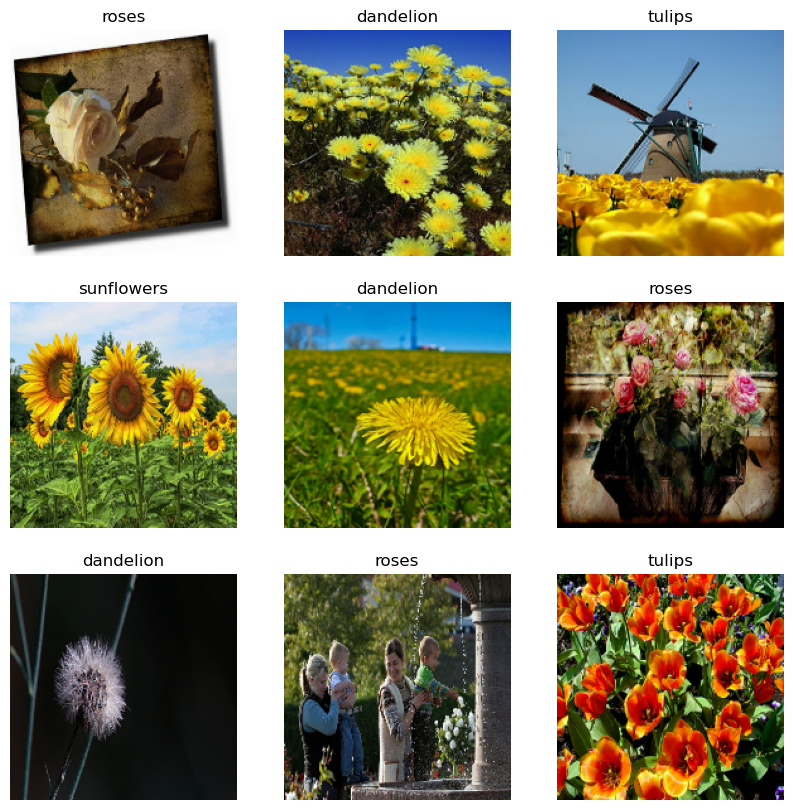

In [12]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### getting the shape of the image

In [13]:
#writing a for loop to get the shape of the image
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


# Building a CNN Model 

#### a. Data Preprocessing and Data Augumentation

#### b. Constructor Stage

#### c. Compilation Stage

#### d. Training Stage

#### e. Visualization Stage

####  f. Evaluation stage 


### Data Preprocessing 

In [14]:
# Configure the dataset for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [15]:
#normalizing the layer
normalization_layer = keras.layers.experimental.preprocessing.Rescaling(1./255)

In [16]:
#mapping out the data and getting out the first out of the list and see the range it falls
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

2024-01-12 10:57:12.560769: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:18: Filling up shuffle buffer (this may take a while): 28 of 1000
2024-01-12 10:57:23.046626: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:18: Filling up shuffle buffer (this may take a while): 49 of 1000
2024-01-12 10:57:43.245262: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:18: Filling up shuffle buffer (this may take a while): 75 of 1000
2024-01-12 10:57:48.878149: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


0.0 1.0


### Constructor Stage

In [17]:
# construct a CNN model after preprocessing.
num_classes = 5
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


# Exercise 2A

#### Describe the architecture of the CNN model that you used (for example, the number and types of layers that you used, the activation functions that you used etc), and discuss your justifications for the choices that you made.

Based on the model given above is based on a series of convolutional layers with max pooling for feature extraction, followed by two fully connected layers for classification. The output layer has as many neurons as there are classes, and the network is designed for a classification task with 5 classes. The ReLU activation function is used throughout, except for the output layer. The Rescaling layer at the beginning is used to normalize pixel values in the input images.

Rescaling layers: rescaling the layer is normal in the preprocessing stage ranging from 0 to 1 is a normal preprocessing step

convolutional blocks : The convolutional blocks consist of Conv2D layers followed by MaxPooling2D layers. This architecture is a common pattern in CNNs for feature extraction. The Conv2D layers with ReLU activation learn spatial hierarchies of features, while the MaxPooling2D layers reduce spatial dimensions, capturing the most important information and making the model more computationally efficient.

Flatten Layer: fter the convolutional and pooling layers, a Flatten layer is used to transform the high-dimensional feature maps into a one-dimensional vector. This is necessary before transitioning to the fully connected layers, as they require a flat input.

Fully Connected (Dense) Layers: The two dense layers at the end are responsible for combining the learned features and making final predictions. The first dense layer with 128 neurons and ReLU activation introduces non-linearity and helps in learning more complex representations. The output layer has as many neurons as there are classes in the classification task (5 in this case) and doesn't have an explicit activation function, which is suitable for a multi-class classification problem.
    
Choice of Activation Function (ReLU): Rectified Linear Unit (ReLU) activation is used in the convolutional and dense layers (except for the output layer). ReLU is a common choice for introducing non-linearity in neural networks, allowing the model to learn complex patterns. It has been widely adopted due to its simplicity and effectiveness in training deep networks.

Output Layer: The output layer has a number of neurons equal to the number of classes in the classification task (5 in this case). The lack of an explicit activation function in the output layer implies a linear activation, suitable for regression or multi-class classification tasks.


# Compilation Stage

In [18]:
#compile the model
model.compile(optimizer = 'adam' , loss = SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'] )

# Training the data

In [19]:
# Training the data
epochs=10

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
   

Epoch 1/10
92/92 [==============================] - 89s 577ms/step - loss: 1.4336 - accuracy: 0.3661 - val_loss: 1.1316 - val_accuracy: 0.5109
Epoch 2/10
92/92 [==============================] - 41s 441ms/step - loss: 1.0960 - accuracy: 0.5361 - val_loss: 1.0175 - val_accuracy: 0.5654
Epoch 3/10
92/92 [==============================] - 38s 417ms/step - loss: 0.9279 - accuracy: 0.6315 - val_loss: 0.9097 - val_accuracy: 0.6199
Epoch 4/10
92/92 [==============================] - 38s 412ms/step - loss: 0.8182 - accuracy: 0.6839 - val_loss: 0.8426 - val_accuracy: 0.6580
Epoch 5/10
92/92 [==============================] - 37s 401ms/step - loss: 0.6820 - accuracy: 0.7299 - val_loss: 0.9975 - val_accuracy: 0.6240
Epoch 6/10
92/92 [==============================] - 39s 430ms/step - loss: 0.5597 - accuracy: 0.7909 - val_loss: 0.8799 - val_accuracy: 0.6703
Epoch 7/10
92/92 [==============================] - 40s 431ms/step - loss: 0.4224 - accuracy: 0.8423 - val_loss: 0.9852 - val_accuracy: 0.6662

In [21]:
val_loss, val_accuracy = model.evaluate(val_ds)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

23/23 [==============================] - 2s 94ms/step - loss: 1.3107 - accuracy: 0.6635
Validation Accuracy: 66.35%


## Exercise 2D

### Was there any evidence of overfitting in any of your models? Justify your answer with suitable figures.

# Visualizing The Results

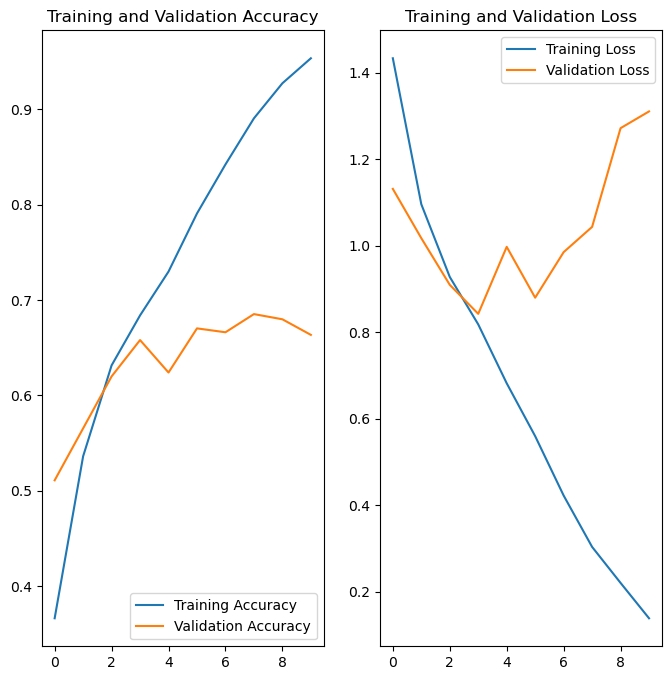

In [22]:
# creating the accuracy and validation accuracy dataframe
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# creating the accuracy and validation accuracy dataframe
loss = history.history['loss']
val_loss = history.history['val_loss']

#create the epoch range
epochs_range = range(epochs)

#visualization and labelling for training and validation accuracy
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#visualization and labelling for training loss and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Overfitting:

In the plots above, the training accuracy is increasing linearly over time, whereas validation accuracy stalls around 60% in the training process. Also, the difference in accuracy between training and validation accuracy is noticeable—a sign of overfitting.

When there are a small number of training examples, the model sometimes learns from noises or unwanted details from training examples—to an extent that it negatively impacts the performance of the model on new examples. This phenomenon is known as overfitting. It means that the model will have a difficult time generalizing on a new dataset

### Data Augumentation

Overfitting generally occurs when there are a small number of training examples. Data augmentation takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

In [23]:
data_augmentation = keras.Sequential(
  [
   RandomFlip("horizontal", 
    input_shape=(img_height, img_width,3)),
    RandomRotation(0.1),
    RandomZoom(0.1),
  ]
)

Let's visualize what a few augmented examples look like by applying data augmentation to the same image several times:

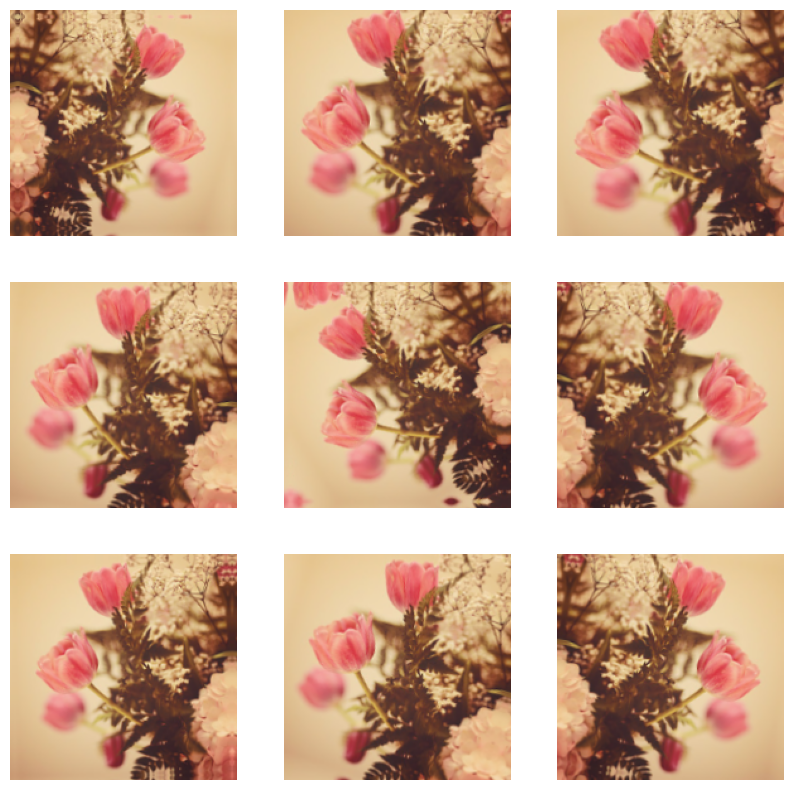

In [24]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

# Exercise 2B 

## Describe the regularisation methods that you used in your CNN model. How do they affect the accuracy of your results?

Dropout:

This is also a regularisation method where randomly neurons are deactivated during training,and this helps to prevent overfitting.
    
Another technique to reduce overfitting is to introduce Dropout to the network, a form of regularization.

When you apply Dropout to a layer it randomly drops out (by setting the activation to zero) a number of output units from the layer during the training process. Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. 

Let's create a new neural network using layers.Dropout, then train it using augmented images.

In [25]:
#creating a CNN model architecture to produce a better accuracy than the previous one

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(filters=64, kernel_size=(3, 3), 
                 padding='same', activation='relu') ,
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(filters=64, kernel_size=(3, 3), 
                 padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
  layers.Conv2D(filters=64, kernel_size=(3, 3), 
                 padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
  layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes, activation="softmax")
])


     

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 90, 90, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 90, 90, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 45, 45, 64)        0         
 g2D)                                                 

## Exercise 2C

### Discuss any other hyperparameter tuning that you undertook to optimise your model. Which hyperparameters have the strongest effect on the performance of your model? Use suitable figures to visualise the accuracy and performance of your final model.

#### There were tons of optimizers used to adjust the accuracy of my model like using the adam optimizer, increasing the number of epochs , introducing the dropout , data augumentation and so on.


In [27]:
#compiling the model again
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
#fitting the model to see the new improved model
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/20
92/92 [==============================] - 113s 1s/step - loss: 1.3359 - accuracy: 0.4288 - val_loss: 1.0821 - val_accuracy: 0.5749
Epoch 2/20
92/92 [==============================] - 107s 1s/step - loss: 1.0470 - accuracy: 0.5848 - val_loss: 0.9907 - val_accuracy: 0.6158
Epoch 3/20
92/92 [==============================] - 110s 1s/step - loss: 0.9078 - accuracy: 0.6488 - val_loss: 0.8936 - val_accuracy: 0.6444
Epoch 4/20
92/92 [==============================] - 106s 1s/step - loss: 0.8308 - accuracy: 0.6866 - val_loss: 0.7868 - val_accuracy: 0.6935
Epoch 5/20
92/92 [==============================] - 109s 1s/step - loss: 0.7991 - accuracy: 0.6975 - val_loss: 0.7438 - val_accuracy: 0.6948
Epoch 6/20
92/92 [==============================] - 114s 1s/step - loss: 0.7431 - accuracy: 0.7176 - val_loss: 0.7626 - val_accuracy: 0.7044
Epoch 7/20
92/92 [==============================] - 108s 1s/step - loss: 0.7125 - accuracy: 0.7231 - val_loss: 0.7516 - val_accuracy: 0.6880
Epoch 8/20
92

In [29]:
val_loss, val_accuracy = model.evaluate(val_ds)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

23/23 [==============================] - 5s 227ms/step - loss: 0.7668 - accuracy: 0.7330
Validation Accuracy: 73.30%


### Training Results after Hyperparameter tuning 


After applying data augmentation and Dropout, there is less overfitting than before, and training and validation accuracy are closer aligned.

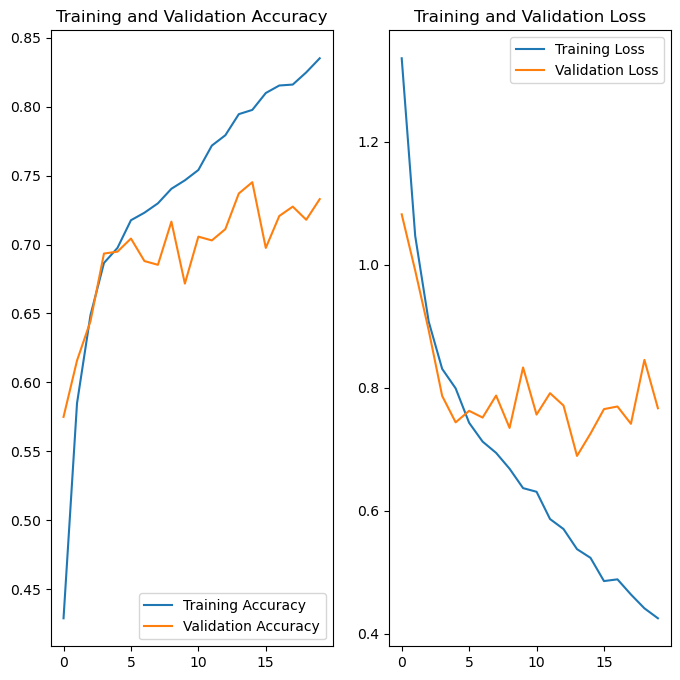

In [30]:
# creating the accuracy and validation accuracy dataframe
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# creating the accuracy and validation accuracy dataframe
loss = history.history['loss']
val_loss = history.history['val_loss']

#create the epoch range
epochs_range = range(epochs)

#visualization and labelling for training and validation accuracy
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#visualization and labelling for training loss and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()